In [76]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [77]:
df = pd.read_csv("Carseats.csv")

In [78]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [79]:
from sklearn.model_selection import train_test_split

In [80]:
df['Urban_Yes'] = pd.Series(np.zeros(df.shape[0]))
df.loc[df['Urban']=='Yes', 'Urban_Yes'] = 1

df['US_Yes'] = pd.Series(np.zeros(df.shape[0]))
df.loc[df['US']=='Yes', 'US_Yes'] = 1

df['ShelveLoc_rank'] = pd.Series(np.zeros(df.shape[0]))
df.loc[df['ShelveLoc']=='Good', 'ShelveLoc_rank'] = 2
df.loc[df['ShelveLoc']=='Medium', 'ShelveLoc_rank'] = 1

In [81]:
X = df[['ShelveLoc_rank','Age', 'Price','Income', 'Advertising','CompPrice']]
y = df['Sales']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [83]:
df['Sales'] = df['Sales'].astype('int64')
df['Urban_Yes'] = df['Urban_Yes'].astype('int64')
df['US_Yes'] = df['US_Yes'].astype('int64')
df['ShelveLoc_rank'] = df['ShelveLoc_rank'].astype('int64')

In [84]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Urban_Yes,US_Yes,ShelveLoc_rank
0,9,138,73,11,276,120,Bad,42,17,Yes,Yes,1,1,0
1,11,111,48,16,260,83,Good,65,10,Yes,Yes,1,1,2
2,10,113,35,10,269,80,Medium,59,12,Yes,Yes,1,1,1
3,7,117,100,4,466,97,Medium,55,14,Yes,Yes,1,1,1
4,4,141,64,3,340,128,Bad,38,13,Yes,No,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12,138,108,17,203,128,Good,33,14,Yes,Yes,1,1,2
396,6,139,23,3,37,120,Medium,55,11,No,Yes,0,1,1
397,7,162,26,12,368,159,Medium,40,18,Yes,Yes,1,1,1
398,5,100,79,7,284,95,Bad,50,12,Yes,Yes,1,1,0


In [85]:
from sklearn.linear_model import LinearRegression

In [86]:
lm = LinearRegression()

In [87]:
lm.fit(X_train, y_train)

LinearRegression()

In [88]:
lm.score(X_train, y_train)

0.8671112946899

In [89]:
lm.coef_

array([ 2.43316818, -0.04784711, -0.09778293,  0.01411763,  0.11523774,
        0.09289272])

In [90]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns = ['Coef'])
print(cdf)

                    Coef
ShelveLoc_rank  2.433168
Age            -0.047847
Price          -0.097783
Income          0.014118
Advertising     0.115238
CompPrice       0.092893


In [91]:
import statsmodels.api as sm

In [92]:
X = sm.add_constant(X_train)
model = sm.OLS(y_train, X)
model_fit = model.fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     296.9
Date:                Fri, 12 Jul 2024   Prob (F-statistic):          1.63e-116
Time:                        13:03:35   Log-Likelihood:                -399.88
No. Observations:                 280   AIC:                             813.8
Df Residuals:                     273   BIC:                             839.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              5.6894      0.598      9.

In [93]:
from sklearn.linear_model import LinearRegression

In [94]:
lm = LinearRegression()

In [95]:
lm.fit(X_train, y_train)

LinearRegression()

In [96]:
predictions = lm.predict(X_test)

Text(0.5, 1.0, 'Sales vs Model Predictions')

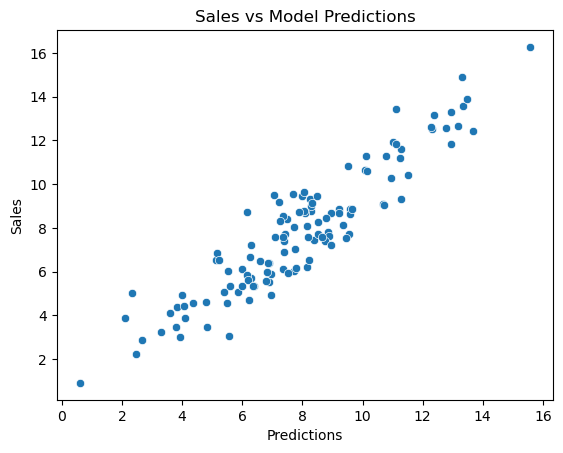

In [97]:
sns.scatterplot(x = predictions, y=y_test)
plt.xlabel("Predictions")
plt.title("Sales vs Model Predictions")


In [98]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [99]:
from sklearn.svm import SVC
model_SVC = SVC(kernel = 'rbf', random_state = 4)
model_SVC.fit(X_train, y_train)

y_pred_svm = model_SVC.decision_function(X_test)

ValueError: Unknown label type: 'continuous'

In [ ]:
from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)

y_pred_logistic = model_logistic.decision_function(X_test)